--- Starting Random Walk Episode ---
Agent starts at: (0, 0)
Step 1: Took action 2 -> New state: (0, 0), Reward: -1
Step 2: Took action 0 -> New state: (0, 0), Reward: -1
Step 3: Took action 0 -> New state: (0, 0), Reward: -1
Step 4: Took action 2 -> New state: (0, 0), Reward: -1
Step 5: Took action 1 -> New state: (1, 0), Reward: -1
Step 6: Took action 0 -> New state: (0, 0), Reward: -1
Step 7: Took action 1 -> New state: (1, 0), Reward: -1
Step 8: Took action 2 -> New state: (1, 0), Reward: -1
Step 9: Took action 1 -> New state: (2, 0), Reward: -1
Step 10: Took action 3 -> New state: (2, 1), Reward: -1
Step 11: Took action 0 -> New state: (1, 1), Reward: -1
Step 12: Took action 3 -> New state: (1, 2), Reward: -1
Step 13: Took action 1 -> New state: (2, 2), Reward: -1
Step 14: Took action 1 -> New state: (3, 2), Reward: -1
Step 15: Took action 3 -> New state: (3, 3), Reward: -1
Step 16: Took action 0 -> New state: (2, 3), Reward: -1
Step 17: Took action 2 -> New state: (2, 2), Reward:

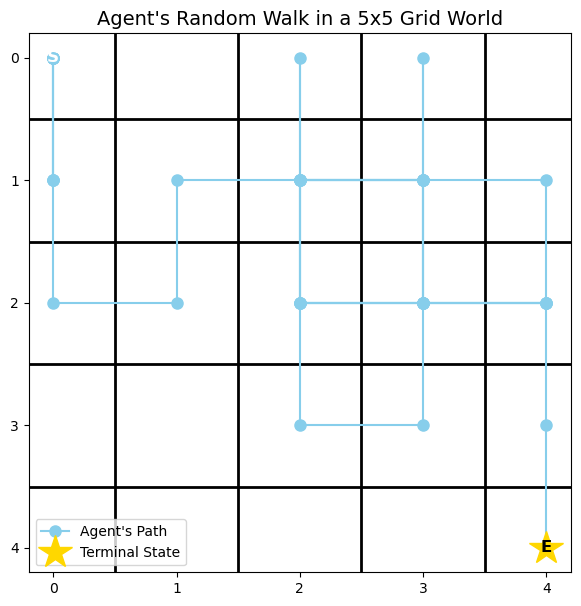

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List

# --- Environment Class ---
class GridWorld:
    """
    Represents a 5x5 Grid World environment.

    The agent's goal is to navigate from a starting position to a terminal state.
    The environment provides rewards and state transitions based on the agent's actions.
    """
    def __init__(self, size: Tuple[int, int] = (5, 5), terminal_state: Tuple[int, int] = (4, 4)):
        """
        Initializes the Grid World.

        Args:
            size (Tuple[int, int]): The (rows, cols) dimensions of the grid.
            terminal_state (Tuple[int, int]): The (row, col) coordinate of the terminal state.
        """
        self.rows, self.cols = size
        self.terminal_state = terminal_state
        
        # Actions: 0=Up, 1=Down, 2=Left, 3=Right
        self.actions = [0, 1, 2, 3]
        self.action_delta = {
            0: (-1, 0),  # Up
            1: (1, 0),   # Down
            2: (0, -1),  # Left
            3: (0, 1)    # Right
        }

    def get_reward(self, state: Tuple[int, int]) -> int:
        """Returns the reward for a given state."""
        return 10 if state == self.terminal_state else -1

    def is_terminal(self, state: Tuple[int, int]) -> bool:
        """Checks if a state is the terminal state."""
        return state == self.terminal_state

    def step(self, state: Tuple[int, int], action: int) -> Tuple[Tuple[int, int], int, bool]:
        """
        Executes one time step in the environment.

        Args:
            state (Tuple[int, int]): The current state (row, col) of the agent.
            action (int): The action to be taken by the agent.

        Returns:
            Tuple[Tuple[int, int], int, bool]: A tuple containing:
                - next_state (Tuple[int, int]): The agent's new state.
                - reward (int): The reward received after taking the action.
                - done (bool): True if the new state is a terminal state, False otherwise.
        """
        # Calculate the potential next state
        row, col = state
        d_row, d_col = self.action_delta[action]
        next_row, next_col = row + d_row, col + d_col

        # Check for boundary conditions: if move is off-grid, stay in the same state
        if not (0 <= next_row < self.rows and 0 <= next_col < self.cols):
            next_row, next_col = row, col

        next_state = (next_row, next_col)
        reward = self.get_reward(next_state)
        done = self.is_terminal(next_state)
        
        return next_state, reward, done

# --- Agent Class ---
class Agent:
    """
    Represents a simple agent that explores the Grid World.
    
    This agent follows a purely random policy, choosing its next action
    uniformly at random from the set of possible actions.
    """
    def __init__(self, start_state: Tuple[int, int] = (0, 0)):
        """
        Initializes the Agent.

        Args:
            start_state (Tuple[int, int]): The starting (row, col) coordinate.
        """
        self.state = start_state
        self.actions = [0, 1, 2, 3] # Corresponds to GridWorld actions

    def choose_action(self) -> int:
        """Chooses an action randomly."""
        return np.random.choice(self.actions)

    def get_state(self) -> Tuple[int, int]:
        """Returns the current state of the agent."""
        return self.state

    def set_state(self, state: Tuple[int, int]):
        """Updates the state of the agent."""
        self.state = state

# --- Visualization Function ---
def visualize_episode(grid_size: Tuple[int, int], path: List[Tuple[int, int]], terminal_state: Tuple[int, int]):
    """
    Visualizes the agent's path on the grid.

    Args:
        grid_size (Tuple[int, int]): The (rows, cols) dimensions of the grid.
        path (List[Tuple[int, int]]): A list of (row, col) coordinates representing the agent's path.
        terminal_state (Tuple[int, int]): The (row, col) coordinate of the terminal state.
    """
    grid = np.zeros(grid_size)
    rows, cols = grid_size
    
    fig, ax = plt.subplots(figsize=(7, 7))

    # Draw the grid lines
    ax.set_xticks(np.arange(-.5, cols, 1), minor=True)
    ax.set_yticks(np.arange(-.5, rows, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", size=0)
    ax.set_xticks(np.arange(0, cols, 1))
    ax.set_yticks(np.arange(0, rows, 1))
    
    # Invert y-axis to match matrix indexing (row 0 at the top)
    ax.invert_yaxis()

    # Plot the path
    if path:
        path_rows, path_cols = zip(*path)
        ax.plot(path_cols, path_rows, marker='o', color='skyblue', linestyle='-', markersize=8, label="Agent's Path")
        
        # Mark Start (S) and End (E)
        ax.text(path_cols[0], path_rows[0], 'S', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
        ax.text(path_cols[-1], path_rows[-1], 'E', ha='center', va='center', color='black', fontsize=12, fontweight='bold')

    # Mark the terminal state with a star
    ax.plot(terminal_state[1], terminal_state[0], '*', color='gold', markersize=25, label='Terminal State')

    ax.set_title("Agent's Random Walk in a 5x5 Grid World", fontsize=14)
    ax.legend()
    plt.show()

# --- Main Simulation Block ---
if __name__ == "__main__":
    # 1. Initialize Environment and Agent
    env = GridWorld(size=(5, 5), terminal_state=(4, 4))
    agent = Agent(start_state=(0, 0))

    # 2. Run one episode
    done = False
    total_reward = 0
    max_steps = 100  # Safety break to prevent infinite loops
    path_taken = [agent.get_state()]
    
    print("--- Starting Random Walk Episode ---")
    print(f"Agent starts at: {agent.get_state()}")

    for step_num in range(max_steps):
        current_state = agent.get_state()
        
        # Agent chooses an action
        action = agent.choose_action()
        
        # Environment responds
        next_state, reward, done = env.step(current_state, action)
        
        # Update agent's state and record metrics
        agent.set_state(next_state)
        path_taken.append(next_state)
        total_reward += reward
        
        print(f"Step {step_num+1}: Took action {action} -> New state: {next_state}, Reward: {reward}")

        if done:
            print("\n--- Episode Finished ---")
            print(f"Terminal state {env.terminal_state} reached!")
            break
    else: # This 'else' belongs to the 'for' loop, it runs if the loop finishes without 'break'
        print("\n--- Episode Finished ---")
        print("Max steps reached without finding the terminal state.")

    print(f"Total Steps: {len(path_taken) - 1}")
    print(f"Total Reward: {total_reward}")
    
    # 3. Visualize the results
    visualize_episode((env.rows, env.cols), path_taken, env.terminal_state)